In [1]:
#similar word extraction on the basis of word 

In [72]:
#!pip install tsne
#!easy_install tsne
#!pip install git+https://github.com/danielfrg/tsne.git
!pip install fasttext

     |████████████████████████████████| 61kB 1.4MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.1-cp37-cp37m-macosx_10_7_x86_64.whl size=270912 sha256=e87dc865da2a2ad4487bd9e1d7e10e037afd025ead3ea97c92dd7a6fce3e69c3
  Stored in directory: /Users/mohitdedhe/Library/Caches/pip/wheels/9f/f0/04/caa82c912aee89ce76358ff954f3f0729b7577c8ff23a292e3
Successfully built fasttext


In [105]:
import os
import tweepy as tw
import pandas as pd
import numpy as np
import re, string
from tqdm import tqdm
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import fasttext
from gensim.models import FastText

In [4]:
consumer_key= 'mxtkW7a8EYHwBd3rMBmWrscda'
consumer_secret= 'qMGuky46B5AJddQ8bO4DfrQnUHuaQ18kVa8k7eQE3zBhtr6Jb4'
access_token= '3267248131-B27E5BJdErwnN1kDUxTSvDrToYVUnZkbfbkiwmp'
access_token_secret= 'jpYfRJ0usnPVg8QurTQiiNzNLjimOobetHNCHT7q3btLc'

In [5]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [6]:
# Define the search term and the date_since date as variables
search_words = "@Citi"
date_since = "2019-11-01"

In [7]:
# Collect tweets
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(3000)


In [ ]:
data=[]
for s in tqdm(tweets):
    data.append(s.text.encode('utf8') )

In [9]:
len(data)

2692

In [10]:
alltwt=[]
for i in data:
    x =str(i, 'utf-8')
    alltwt.append(' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [11]:
#remove the stopwords
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english')) 

In [12]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
out_arr=[]
for twt in tqdm(alltwt):
    data = twt.split()
    inner_arr=[]
    for i in data:
        if i not in stop_words:
            inner_arr.append((lemmatizer.lemmatize(i.lower())))
    out_arr.append(inner_arr)


100%|██████████| 2692/2692 [00:02<00:00, 1221.53it/s]


In [13]:
from gensim.models import Word2Vec
import gensim

In [14]:
model = gensim.models.Word2Vec(out_arr, min_count=1,size=200,window=2,iter=20,workers=2)

In [15]:
word = "service"
model.wv.most_similar(positive=word, topn=20)

[('customer', 0.9311262369155884),
 ('argued', 0.906105101108551),
 ('within', 0.905686616897583),
 ('provided', 0.8962585926055908),
 ('ever', 0.8921598196029663),
 ('innovating', 0.8910062313079834),
 ('internet', 0.8888826370239258),
 ('bankstoavoid', 0.8860342502593994),
 ('aa', 0.8858636617660522),
 ('financial', 0.8856110572814941),
 ('hello', 0.8824893832206726),
 ('direct', 0.8819641470909119),
 ('regtech', 0.8811900615692139),
 ('leave', 0.8695508241653442),
 ('hell', 0.8670171499252319),
 ('mine', 0.8666542768478394),
 ('experienced', 0.8647803068161011),
 ('hateeeee', 0.8631205558776855),
 ('reward', 0.8606590628623962),
 ('november', 0.8597264289855957)]

In [16]:
word = "customer"
model.wv.most_similar(positive=word, topn=20)

[('hello', 0.9638131260871887),
 ('within', 0.9626621007919312),
 ('disappointed', 0.9606294631958008),
 ('ever', 0.9594503045082092),
 ('hell', 0.9593594074249268),
 ('statement', 0.9574612379074097),
 ('november', 0.9571257829666138),
 ('experienced', 0.9554873704910278),
 ('number', 0.950919508934021),
 ('closed', 0.9498679041862488),
 ('recieved', 0.947202205657959),
 ('money', 0.9461343288421631),
 ('calling', 0.945974588394165),
 ('owned', 0.9456969499588013),
 ('called', 0.9456478357315063),
 ('but', 0.9443836212158203),
 ('spoken', 0.944248378276825),
 ('locked', 0.9434773921966553),
 ('applied', 0.9432414770126343),
 ('excellent', 0.9429590702056885)]

In [17]:
model.wv.similarity(w1="good", w2="bad")

0.9447944

In [27]:
# We will also need to get the words closest to a word
model.similar_by_word('service')

/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  


[('customer', 0.9311262369155884),
 ('argued', 0.906105101108551),
 ('within', 0.905686616897583),
 ('provided', 0.8962585926055908),
 ('ever', 0.8921598196029663),
 ('innovating', 0.8910062313079834),
 ('internet', 0.8888826370239258),
 ('bankstoavoid', 0.8860342502593994),
 ('aa', 0.8858636617660522),
 ('financial', 0.8856110572814941)]

In [38]:
#print(model['service']) 

In [63]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,200), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.000005, x_coords.max()+0.000005)
    plt.ylim(y_coords.min()+0.000005, y_coords.max()+0.000005)
    plt.show()

/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  import sys
/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if sys.path[0] == '':
/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/ip

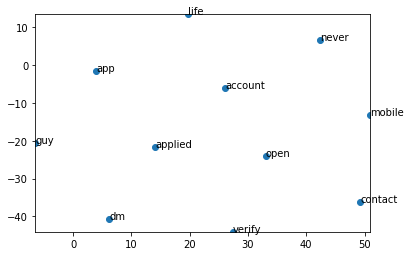

In [71]:
display_closestwords_tsnescatterplot(model, 'account')

In [19]:
model.wv.evaluate_word_analogies('questions-words.txt', restrict_vocab=20000, case_insensitive=True)

(0.0,
 [{'section': 'capital-common-countries',
   'correct': [],
   'incorrect': [('BEIJING', 'CHINA', 'LONDON', 'ENGLAND'),
    ('LONDON', 'ENGLAND', 'BEIJING', 'CHINA')]},
  {'section': 'capital-world', 'correct': [], 'incorrect': []},
  {'section': 'currency',
   'correct': [],
   'incorrect': [('BRAZIL', 'REAL', 'USA', 'DOLLAR'),
    ('USA', 'DOLLAR', 'BRAZIL', 'REAL')]},
  {'section': 'city-in-state', 'correct': [], 'incorrect': []},
  {'section': 'family',
   'correct': [],
   'incorrect': [('FATHER', 'MOTHER', 'HE', 'SHE'),
    ('FATHER', 'MOTHER', 'MAN', 'WOMAN'),
    ('HE', 'SHE', 'MAN', 'WOMAN'),
    ('HE', 'SHE', 'FATHER', 'MOTHER'),
    ('MAN', 'WOMAN', 'FATHER', 'MOTHER'),
    ('MAN', 'WOMAN', 'HE', 'SHE')]},
  {'section': 'gram1-adjective-to-adverb', 'correct': [], 'incorrect': []},
  {'section': 'gram2-opposite', 'correct': [], 'incorrect': []},
  {'section': 'gram3-comparative',
   'correct': [],
   'incorrect': [('BAD', 'WORSE', 'BIG', 'BIGGER'),
    ('BAD', 'WORSE', 

In [109]:
with open("output.txt", "w") as txt_file:
    for line in alltwt:
        txt_file.write(line + "\n")

In [113]:
modelfast = FastText(out_arr, size=100, window=5, min_count=5, workers=4,sg=1)

In [95]:
#modelfast = fasttext.train_supervised("output.txt", lr=0.1, dim=200, epoch=5, word_ngrams=2, loss='softmax')

In [116]:
modelfast.wv.most_similar("customer")


[('issue', 0.9891282320022583),
 ('within', 0.9747742414474487),
 ('treasurer', 0.9745684862136841),
 ('behin', 0.9557595252990723),
 ('taken', 0.9545921087265015),
 ('18', 0.953281581401825),
 ('account', 0.9515901803970337),
 ('team', 0.9514745473861694),
 ('credit', 0.9505648612976074),
 ('email', 0.9492749571800232)]

In [119]:
modelfast.wv.most_similar("sanction")

[('action', 0.8374758958816528),
 ('tradition', 0.7824705243110657),
 ('responsibility', 0.7539868950843811),
 ('operation', 0.7440914511680603),
 ('corporation', 0.7398226261138916),
 ('selection', 0.7368752956390381),
 ('conversation', 0.7273006439208984),
 ('reduce', 0.7272038459777832),
 ('current', 0.7231869697570801),
 ('remove', 0.7198596000671387)]

In [127]:
modelfast.similarity("good","bad")

/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).
  """Entry point for launching an IPython kernel.


0.69624597

<h1>Topic Modeling LDA</h1>

In [20]:
from gensim import corpora
dictionary = corpora.Dictionary(out_arr)
corpus = [dictionary.doc2bow(text) for text in out_arr]
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

In [21]:
import gensim
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model3.gensim')
topics = ldamodel.print_topics(num_words=6)
for topic in topics:
    print(topic)

(0, '0.080*"rt" + 0.041*"proud" + 0.037*"series" + 0.037*"spotted" + 0.037*"127" + 0.037*"concert"')
(1, '0.044*"rt" + 0.016*"presented" + 0.015*"reserve" + 0.015*"force" + 0.015*"tip" + 0.015*"off"')
(2, '0.080*"rt" + 0.054*"time" + 0.052*"presented" + 0.052*"100" + 0.052*"next" + 0.051*"time100next"')
(3, '0.051*"citi" + 0.050*"rt" + 0.026*"global" + 0.025*"head" + 0.024*"sara" + 0.024*"hr"')


In [22]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model3.gensim')
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)


/Users/mohitdedhe/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


<h4>TFIDF</h4>

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [24]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(alltwt)
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=feature_names)

In [25]:
df.to_csv('tfidf.csv')